In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score, plot_confusion_matrix , classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from collections import Counter

In [5]:
essay_data = pd.read_csv('/content/Essay-Features.csv')

In [6]:
essay_data.shape

(1332, 19)

In [7]:
essay_data.head()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
0,1457,2153,426,14,6,0,5.053991,16,0,26.625000,423.995272,0.995294,207,0.485915,105,0.246479,424,412,4
1,503,1480,292,9,7,0,5.068493,11,0,26.545455,290.993103,0.996552,148,0.506849,77,0.263699,356,345,4
2,253,3964,849,19,26,1,4.669022,49,2,17.326531,843.990544,0.994100,285,0.335689,130,0.153121,750,750,4
3,107,988,210,8,7,0,4.704762,12,0,17.500000,207.653784,0.988828,112,0.533333,62,0.295238,217,209,3
4,1450,3139,600,13,8,0,5.231667,24,1,25.000000,594.652150,0.991087,255,0.425000,165,0.275000,702,677,4


In [8]:
essay_data.tail()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
1327,1151,2404,467,16,10,0,5.147752,22,0,21.227273,462.987069,0.991407,200,0.428266,113,0.241970,529,519,4
1328,1015,1182,241,0,14,0,4.904564,16,0,15.062500,238.655462,0.990272,94,0.390041,67,0.278008,293,283,3
1329,1345,1814,363,5,11,0,4.997245,13,3,27.923077,362.329640,0.998153,170,0.468320,107,0.294766,427,415,3
1330,344,1427,287,5,8,0,4.972125,13,1,22.076923,284.657277,0.991837,144,0.501742,83,0.289199,323,312,3
1331,1077,2806,542,24,6,0,5.177122,22,3,24.636364,538.988889,0.994444,284,0.523985,155,0.285978,596,575,4


In [9]:
# Generate descriptive statistics for the essay_data DataFrame
essay_data.describe()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
count,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000
mean,905.27027,2101.745495,424.485736,14.667417,8.141141,0.47973,4.939762,19.704204,1.222973,23.884687,420.596542,0.989935,198.913664,0.469164,110.16967,0.263846,468.987988,455.507508,3.427177
std,526.68760,865.963750,171.873730,10.920781,6.124520,1.27168,0.231071,19.202731,1.847446,11.160020,170.985111,0.007308,82.729266,0.052466,43.96192,0.038870,159.447449,155.751220,0.774275
min,0.00000,169.000000,36.000000,0.000000,2.000000,0.00000,2.231322,0.000000,0.000000,1.084112,35.647059,0.924771,14.000000,0.288889,11.00000,0.027299,48.000000,50.000000,1.000000
25%,442.75000,1527.250000,310.000000,7.000000,4.000000,0.00000,4.791679,13.000000,0.000000,19.142857,305.406284,0.987758,144.000000,0.435709,81.00000,0.238423,361.000000,350.750000,3.000000
50%,914.50000,2029.500000,411.000000,13.000000,6.000000,0.00000,4.946059,18.000000,1.000000,22.030331,406.982869,0.991572,193.000000,0.465852,107.50000,0.262872,463.000000,448.000000,3.000000
75%,1369.75000,2613.500000,525.000000,21.000000,11.000000,0.00000,5.092938,24.000000,2.000000,26.048234,520.739458,0.994425,246.000000,0.500000,134.00000,0.288277,581.000000,561.250000,4.000000
max,1799.00000,6142.000000,1170.000000,72.000000,51.000000,26.00000,5.681429,642.000000,17.000000,303.000000,1158.984563,1.000000,669.000000,0.961207,355.00000,0.465517,750.000000,750.000000,6.000000


In [10]:
# display the variance for each column
essay_data.var()


,0
essayid,277399.827726
chars,749893.216171
words,29540.579060
commas,119.263460
apostrophes,37.509741
punctuations,1.617170
avg_word_length,0.053394
sentences,368.744896
questions,3.413056
avg_word_sentence,124.546047


In [11]:
# extract values from every row, last column
label = essay_data.iloc[:,-1].values

In [12]:
# extract values from every row, from first to second last column (i.e. columns index 0 to 17)
features = essay_data.iloc[:,:-1].values

In [13]:
# the f_classif() function takes in the features and label data and returns the F-values for each feature
F_vals, _ = f_classif(features, label)

# gets the list of (feature) column names
cols = essay_data.columns[:-1]
# sort based on the F-values in descending order
ind = np.lexsort((cols,F_vals))[::-1]

print("----List of features from highest to lowest F-value----\n")
# for each feature, display the column (feature) name along with its F-value
for index in ind:
    print("{} = {}".format(cols[index], F_vals[index]))

----List of features from highest to lowest F-value----

unstemmed = 255.8948587663438
stemmed = 254.33217075322452
chars = 236.13263126536944
POS = 209.80140389791052
words = 208.92684234127228
prompt_words = 186.39330700069752
synonym_words = 135.72391926093715
commas = 106.40189465413823
POS/total_words = 33.979754886876925
apostrophes = 33.93409241646121
questions = 32.777162227254095
avg_word_length = 32.4444185987326
synonym_words/total_words = 28.505876406086006
sentences = 15.93339650670346
punctuations = 7.439281205003285
avg_word_sentence = 5.065326414935797
prompt_words/total_words = 1.892359146703505
essayid = 1.1098589592655128


In [14]:
# specify the column headers of the features we want to keep
selected_cols = ['unstemmed', 'stemmed', 'chars', 'POS', 'words', 'prompt_words', 'synonym_words', 'commas']
# extract the values only from the selected columns
selected_features = essay_data[selected_cols].values

In [15]:
# first parameter is the (selected) feature values
# second parameter is the label values
# test_size parameter takes a float between 0 and 1, which represents the proportion of the test set to the entire dataset
# random_state parameter takes in an int so that the output is reproducible
X_train, X_test, y_train, y_test = train_test_split(selected_features, label, test_size=0.2, random_state=42)

In [16]:
train_rows, train_cols = X_train.shape
test_rows, test_cols = X_test.shape
print("X_train has {} rows and {} columns".format(train_rows, train_cols))
print("X_test has {} rows and {} columns".format(test_rows, test_cols))
print("proportion of data in the X_test to the entire dataset:", test_rows/essay_data.shape[0])

X_train has 1065 rows and 8 columns
X_test has 267 rows and 8 columns
proportion of data in the X_test to the entire dataset: 0.20045045045045046


In [17]:
# define the scaler we are going to use as the MinMaxScaler
# we are going to scale the features to the default range of [0,1] since we have no negative values
scaler = MinMaxScaler()

# fit the scaler to the training data which computes the minimum and maximum of every feature in X_train
# then we transform X_train to scale the data according to the computed minimum and maximum
X_train = scaler.fit_transform(X_train)
# Here we transform X_test using the minimum and maximum of the corresponding features in X_train
X_test = scaler.transform(X_test)

In [18]:
print("Minimum values for each feature in the training set:",X_train.min(axis=0))
print("Maximum values for each feature in the training set:", X_train.max(axis=0))
print("Minimum values for each feature in the test set:", X_test.min(axis=0))
print("Maximum values for each feature in the test set:", X_test.max(axis=0))

Minimum values for each feature in the training set: [0. 0. 0. 0. 0. 0. 0. 0.]
Maximum values for each feature in the training set: [1. 1. 1. 1. 1. 1. 1. 1.]
Minimum values for each feature in the test set: [0.01709402 0.01571429 0.00070909 0.00032579 0.0018315  0.
 0.         0.        ]
Maximum values for each feature in the test set: [1.         1.         1.05885481 1.03691839 1.03846154 1.2405303
 1.17006803 0.68055556]


In [19]:
# instantiate the SVC
# provide an integer for random_state so that the output is reproducible
svm = SVC(random_state = 42)

# lists the possible values for the 3 important parameters - kernel, C, and gamma
parameters = [
    {'C' : [0.1, 1, 10, 100, 1000], 'kernel' : ['linear']},
    {'C' : [0.1, 1, 10, 100, 1000], 'gamma' : [0.0001, 0.001, 0.01, 0.1, 1, 10], 'kernel' : [ 'rbf']}
]

# in the first parameter the estimator for which we want to test out the parameter combinations is passed in
# In the second parameter, try every combination of parameter values for the provided estimator (svm)
# verbose parameter controls its verbosity, a value of 1 just displays the total number of combinations
opt_svm = GridSearchCV(svm, parameters, verbose=10)

# fit the svm to the training set and try all the parameter combinations to find the best one
opt_svm.fit(X_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5; 1/35] START C=0.1, kernel=linear.......................................
[CV 1/5; 1/35] END ........C=0.1, kernel=linear;, score=0.582 total time=   0.1s
[CV 2/5; 1/35] START C=0.1, kernel=linear.......................................
[CV 2/5; 1/35] END ........C=0.1, kernel=linear;, score=0.667 total time=   0.1s
[CV 3/5; 1/35] START C=0.1, kernel=linear.......................................
[CV 3/5; 1/35] END ........C=0.1, kernel=linear;, score=0.592 total time=   0.0s
[CV 4/5; 1/35] START C=0.1, kernel=linear.......................................


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[CV 4/5; 1/35] END ........C=0.1, kernel=linear;, score=0.629 total time=   0.1s
[CV 5/5; 1/35] START C=0.1, kernel=linear.......................................
[CV 5/5; 1/35] END ........C=0.1, kernel=linear;, score=0.582 total time=   0.1s
[CV 1/5; 2/35] START C=1, kernel=linear.........................................
[CV 1/5; 2/35] END ..........C=1, kernel=linear;, score=0.671 total time=   0.1s
[CV 2/5; 2/35] START C=1, kernel=linear.........................................
[CV 2/5; 2/35] END ..........C=1, kernel=linear;, score=0.709 total time=   0.1s
[CV 3/5; 2/35] START C=1, kernel=linear.........................................
[CV 3/5; 2/35] END ..........C=1, kernel=linear;, score=0.629 total time=   0.1s
[CV 4/5; 2/35] START C=1, kernel=linear.........................................
[CV 4/5; 2/35] END ..........C=1, kernel=linear;, score=0.671 total time=   0.1s
[CV 5/5; 2/35] START C=1, kernel=linear.........................................
[CV 5/5; 2/35] END .........

GridSearchCV(estimator=SVC(random_state=42),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                          'kernel': ['rbf']}],
             verbose=10)

In [20]:
opt_svm.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [21]:
# get the predictions of the essays in the test set
predictions = opt_svm.predict(X_test)

In [22]:
predictions

array([3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4, 3,
       3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 3, 4, 3, 3, 4, 3, 4, 3, 2, 4, 4, 4,
       4, 3, 3, 2, 4, 3, 4, 3, 4, 4, 4, 2, 4, 3, 4, 4, 4, 3, 5, 4, 3, 5,
       3, 4, 3, 3, 3, 4, 3, 2, 4, 3, 4, 4, 3, 4, 3, 3, 4, 4, 3, 3, 4, 4,
       2, 3, 4, 3, 4, 4, 3, 4, 4, 4, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3,
       4, 4, 4, 3, 4, 4, 3, 4, 4, 3, 3, 2, 4, 3, 3, 4, 4, 3, 4, 3, 3, 4,
       4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 3, 3, 4, 3,
       3, 1, 4, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 3, 4, 3, 4, 3, 4, 3, 4, 4,
       3, 4, 3, 4, 3, 3, 2, 3, 3, 4, 4, 3, 3, 2, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 4, 3, 4, 4, 2, 3,
       3, 3, 4, 3, 4, 3, 3, 3, 3, 2, 3, 4, 4, 4, 4, 3, 4, 4, 3, 3, 4, 4,
       2, 4, 4, 4, 4, 3, 2, 3, 3, 3, 4, 3, 4, 4, 4, 1, 3, 3, 4, 3, 3, 4,
       3, 4, 4])

In [23]:
print("Minimum score predicted: ", predictions.min())
print("Maximum score predicted: ", predictions.max())

Minimum score predicted:  1
Maximum score predicted:  5


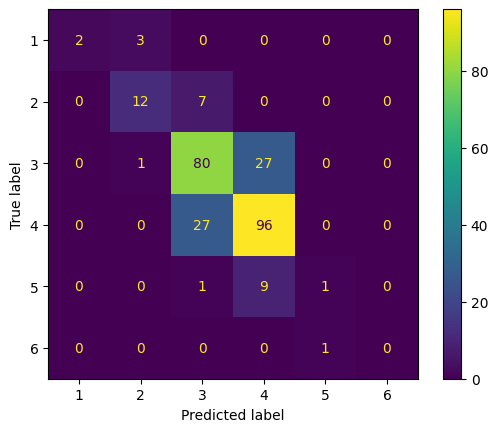

In [24]:
# compute the confusion matrix using the actual scores of the essays in the test set and the model predictions
cm = confusion_matrix(y_test, predictions)
# first parameter is the confusion matrix computed
# display_labels parameter defines the list of possible labels (from 1 to 6), since essay scores range from 1-6
disp = ConfusionMatrixDisplay(cm, display_labels=[1,2,3,4,5,6])

# display the confusion matrix
disp.plot()

In [25]:
# display the QWK for the model predictions
cohen_kappa_score(y_test, predictions, weights='quadratic')

0.7133519059590949

In [26]:
kaggle_data = pd.read_csv('/content/Essay-Features.csv')

In [27]:
kaggle_data

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
0,1457,2153,426,14,6,0,5.053991,16,0,26.625000,423.995272,0.995294,207,0.485915,105,0.246479,424,412,4
1,503,1480,292,9,7,0,5.068493,11,0,26.545455,290.993103,0.996552,148,0.506849,77,0.263699,356,345,4
2,253,3964,849,19,26,1,4.669022,49,2,17.326531,843.990544,0.994100,285,0.335689,130,0.153121,750,750,4
3,107,988,210,8,7,0,4.704762,12,0,17.500000,207.653784,0.988828,112,0.533333,62,0.295238,217,209,3
4,1450,3139,600,13,8,0,5.231667,24,1,25.000000,594.652150,0.991087,255,0.425000,165,0.275000,702,677,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,1151,2404,467,16,10,0,5.147752,22,0,21.227273,462.987069,0.991407,200,0.428266,113,0.241970,529,519,4
1328,1015,1182,241,0,14,0,4.904564,16,0,15.062500,238.655462,0.990272,94,0.390041,67,0.278008,293,283,3
1329,1345,1814,363,5,11,0,4.997245,13,3,27.923077,362.329640,0.998153,170,0.468320,107,0.294766,427,415,3
1330,344,1427,287,5,8,0,4.972125,13,1,22.076923,284.657277,0.991837,144,0.501742,83,0.289199,323,312,3


In [28]:
# specify the column headers of the features we want to keep
selected_cols = ['unstemmed', 'stemmed', 'chars', 'POS', 'words', 'prompt_words', 'synonym_words', 'commas']
# extract the values only from the selected columns
selected_features = kaggle_data[selected_cols].values

In [29]:
# scale the data with the same scaler used for the training and test set
X_kaggle = scaler.transform(selected_features)

In [30]:
kaggle_predictions = opt_svm.predict(X_kaggle)

In [31]:
kaggle_predictions

array([4, 3, 4, ..., 3, 3, 4])

In [32]:
# extract the essayid column from kaggle_data
df_predictions = kaggle_data["essayid"]
# convert the Series to a DataFrame
df_predictions = df_predictions.to_frame()
# create new column score and fill it with the model's predictions
df_predictions["score"] = pd.Series(kaggle_predictions)

# display the DataFrame
df_predictions

,essayid,score
0,1457,4
1,503,3
2,253,4
3,107,3
4,1450,4
...,...,...
1327,1151,4
1328,1015,3
1329,1345,3
1330,344,3


In [33]:
all_features = essay_data.iloc[:, 1:-1].values

In [34]:
Counter(label)

Counter({4: 583, 3: 557, 2: 110, 1: 18, 5: 60, 6: 4})

In [35]:
# k_neighbors is the number of nearest neighbours to construct syntethic samples
# set random_state to an integer so that output is reproducible
oversample = SMOTE(k_neighbors = 1, random_state = 209476)

# resample the dataset
features_over, label_over = oversample.fit_resample(all_features, label)

In [36]:
# test_size parameter determines the proportion of the test set overt the entire dataset
# an integer is passed in random_state to ensure reproducible output
X_train, X_test, y_train, y_test = train_test_split(features_over, label_over, test_size=0.2, random_state=42)

In [37]:
# define the scaler as the StandardScaler()
scaler = StandardScaler()

# fit the scaler to the training data which computes the mean and standard deviation of every feature in X_train
# then we transform X_train to scale the data according to the computed mean and standard deviation
X_train = scaler.fit_transform(X_train)
# Here we transform X_test using the mean and standard deviation of the corresponding features in X_train
X_test = scaler.transform(X_test)

In [38]:
# instantiate the RandomForestClassifier
# provide an integer for random_state so that the output is reproducible
rfc = RandomForestClassifier(random_state = 42)

# provide list of possible parameter values
parameters={'n_estimators' : [5, 10, 15, 20],
            'max_depth' : [2, 5, 7, 9]}

# in the first parameter the estimator for which we want to test out the parameter combinations is passed in
# In the second parameter, try every combination of parameter values for the provided estimator (rfc)
# verbose parameter controls its verbosity, a value of 1 just displays the total number of combinations
opt_rfc = GridSearchCV(rfc, parameters, verbose=10)
# fit the rfc to the training set and try all the parameter combinations to find the best one
opt_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START max_depth=2, n_estimators=5................................
[CV 1/5; 1/16] END .max_depth=2, n_estimators=5;, score=0.613 total time=   0.0s
[CV 2/5; 1/16] START max_depth=2, n_estimators=5................................
[CV 2/5; 1/16] END .max_depth=2, n_estimators=5;, score=0.623 total time=   0.0s
[CV 3/5; 1/16] START max_depth=2, n_estimators=5................................
[CV 3/5; 1/16] END .max_depth=2, n_estimators=5;, score=0.632 total time=   0.0s
[CV 4/5; 1/16] START max_depth=2, n_estimators=5................................
[CV 4/5; 1/16] END .max_depth=2, n_estimators=5;, score=0.578 total time=   0.0s
[CV 5/5; 1/16] START max_depth=2, n_estimators=5................................
[CV 5/5; 1/16] END .max_depth=2, n_estimators=5;, score=0.623 total time=   0.0s
[CV 1/5; 2/16] START max_depth=2, n_estimators=10...............................
[CV 1/5; 2/16] END max_depth=2, n_estimators=10;

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 5, 7, 9],
                         'n_estimators': [5, 10, 15, 20]},
             verbose=10)

In [39]:
opt_rfc.best_params_

{'max_depth': 9, 'n_estimators': 20}

In [40]:
opt_rfc_predictions = opt_rfc.predict(X_test)

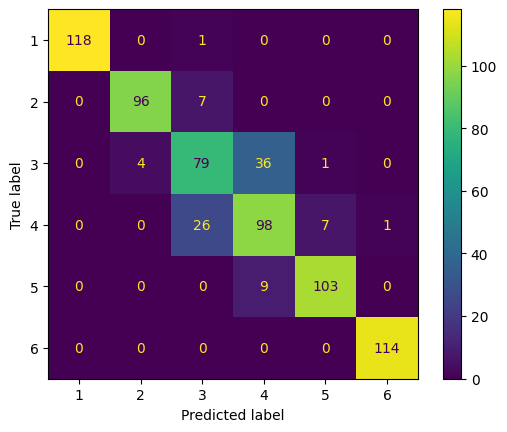

In [41]:
# compute the confusion matrix using the actual scores of the essays in the test set and the model predictions
cm = confusion_matrix(y_test, opt_rfc_predictions)
# first parameter is the confusion matrix computed
# display_labels parameter defines the list of possible labels (from 1 to 6), since essay scores range from 1-6
disp = ConfusionMatrixDisplay(cm, display_labels=[1,2,3,4,5,6])

# display the confusion matrix
disp.plot()

In [42]:
print(cohen_kappa_score(y_test, opt_rfc_predictions, weights='quadratic'))

0.9747343352878785


In [44]:
# read the file, convert it into a DataFrame
kaggle_data = pd.read_csv('/content/Essay-Features.csv')

In [45]:
kaggle_data.shape

(1332, 19)

In [46]:
kaggle_data.head()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
0,1457,2153,426,14,6,0,5.053991,16,0,26.625000,423.995272,0.995294,207,0.485915,105,0.246479,424,412,4
1,503,1480,292,9,7,0,5.068493,11,0,26.545455,290.993103,0.996552,148,0.506849,77,0.263699,356,345,4
2,253,3964,849,19,26,1,4.669022,49,2,17.326531,843.990544,0.994100,285,0.335689,130,0.153121,750,750,4
3,107,988,210,8,7,0,4.704762,12,0,17.500000,207.653784,0.988828,112,0.533333,62,0.295238,217,209,3
4,1450,3139,600,13,8,0,5.231667,24,1,25.000000,594.652150,0.991087,255,0.425000,165,0.275000,702,677,4


In [47]:
kaggle_data.tail()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
1327,1151,2404,467,16,10,0,5.147752,22,0,21.227273,462.987069,0.991407,200,0.428266,113,0.241970,529,519,4
1328,1015,1182,241,0,14,0,4.904564,16,0,15.062500,238.655462,0.990272,94,0.390041,67,0.278008,293,283,3
1329,1345,1814,363,5,11,0,4.997245,13,3,27.923077,362.329640,0.998153,170,0.468320,107,0.294766,427,415,3
1330,344,1427,287,5,8,0,4.972125,13,1,22.076923,284.657277,0.991837,144,0.501742,83,0.289199,323,312,3
1331,1077,2806,542,24,6,0,5.177122,22,3,24.636364,538.988889,0.994444,284,0.523985,155,0.285978,596,575,4


In [53]:
kaggle_features = kaggle_data.iloc[:, 1:18].values
X_kaggle = scaler.transform(kaggle_features)

In [54]:
kaggle_predictions = opt_rfc.predict(X_kaggle)

In [55]:
kaggle_predictions

array([4, 3, 4, ..., 3, 3, 4])

In [56]:
print("Minimum score predicted:", kaggle_predictions.min())
print("Maximum score predicted:", kaggle_predictions.max())

Minimum score predicted: 1
Maximum score predicted: 6


In [57]:
# extract the essayid column from kaggle_data
df_predictions = kaggle_data["essayid"]
# convert the Series to a DataFrame
df_predictions = df_predictions.to_frame()
# create new column score and fill it with the model's predictions
df_predictions["score"] = pd.Series(kaggle_predictions)

# display the DataFrame
df_predictions

,essayid,score
0,1457,4
1,503,3
2,253,4
3,107,3
4,1450,4
...,...,...
1327,1151,4
1328,1015,3
1329,1345,3
1330,344,3
